# Tutorial: optimal binning 2D with continuous target

To get us started, let's load a well-known dataset from the UCI repository and transform the data into a ``pandas.DataFrame``.

In [1]:
import pandas as pd
from tests.datasets import load_boston

In [2]:
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)

We choose two variables to discretize and the continuous target.

In [3]:
variable1 = "AGE"
variable2 = "INDUS"

x = df[variable1].values
y = df[variable2].values
z = data.target

Import and instantiate an ``ContinuousOptimalBinning2D`` object class. We pass the variable names (coordinates x and y), and a solver, in this case, we choose the constraint programming solver.

In [4]:
from optbinning import ContinuousOptimalBinning2D

In [5]:
optb = ContinuousOptimalBinning2D(name_x=variable1, name_y=variable2, solver="cp")

We fit the optimal binning object with arrays ``x``, ``y``, and ``z``.

In [6]:
optb.fit(x, y, z)

ContinuousOptimalBinning2D(name_x='AGE', name_y='INDUS')

Similar to other OptBinning classes, you can inspect the attributes ``status`` and ``splits``. In this case, the splits shown are actually the bins, but the ``splits`` name is used to maintain API homogeneity.

In [7]:
optb.status

'OPTIMAL'

In [8]:
optb.splits

([[-inf, 37.25],
  [37.25, 76.25],
  [76.25, 92.29999923706055],
  [92.29999923706055, 98.25],
  [98.25, inf],
  [-inf, 37.25],
  [37.25, 76.25],
  [76.25, 92.29999923706055],
  [92.29999923706055, 98.25],
  [-inf, 37.25],
  [37.25, 76.25],
  [76.25, 98.25],
  [98.25, inf],
  [-inf, 37.25],
  [37.25, 76.25],
  [76.25, 92.29999923706055],
  [92.29999923706055, 98.25],
  [-inf, 76.25],
  [76.25, 92.29999923706055],
  [92.29999923706055, 98.25],
  [98.25, inf]],
 [[-inf, 3.9850000143051147],
  [-inf, 3.9850000143051147],
  [-inf, 3.9850000143051147],
  [-inf, 3.9850000143051147],
  [-inf, 6.080000162124634],
  [3.9850000143051147, 6.080000162124634],
  [3.9850000143051147, 6.080000162124634],
  [3.9850000143051147, 6.080000162124634],
  [3.9850000143051147, 6.080000162124634],
  [6.080000162124634, 6.659999847412109],
  [6.080000162124634, 6.659999847412109],
  [6.080000162124634, 6.659999847412109],
  [6.080000162124634, 16.570000171661377],
  [6.659999847412109, 16.570000171661377],
  [

#### The binning table

The binning table follows the same structure as the unidimensional binning, except for having two Bin columns, one for each variable (coordinate). The option ``show_bin_xy=True`` in method ``build`` combines both columns to obtain a single Bin column.

In [9]:
optb.binning_table.build()

,Bin x,Bin y,Count,Count (%),Sum,Std,Mean,WoE,IV
0,"(-inf, 37.25)","(-inf, 3.99)",43,0.084980,1317.3,9.113544,30.634884,8.102077,0.688516
1,"[37.25, 76.25)","(-inf, 3.99)",35,0.069170,1115.1,8.144242,31.860000,9.327194,0.645162
2,"[76.25, 92.30)","(-inf, 3.99)",10,0.019763,370.6,8.343644,37.060000,14.527194,0.287099
3,"[92.30, 98.25)","(-inf, 3.99)",2,0.003953,63.5,0.750000,31.750000,9.217194,0.036432
4,"[98.25, inf)","(-inf, 6.08)",2,0.003953,66.1,2.950000,33.050000,10.517194,0.041570
5,"(-inf, 37.25)","[3.99, 6.08)",27,0.053360,680.8,5.262706,25.214815,2.682008,0.143111
6,"[37.25, 76.25)","[3.99, 6.08)",36,0.071146,773.6,2.676002,21.488889,-1.043917,0.074271
7,"[76.25, 92.30)","[3.99, 6.08)",4,0.007905,84.8,2.388514,21.200000,-1.332806,0.010536
8,"[92.30, 98.25)","[3.99, 6.08)",1,0.001976,16.0,0.000000,16.000000,-6.532806,0.012911
9,"(-inf, 37.25)","[6.08, 6.66)",7,0.013834,232.3,5.962365,33.185714,10.652908,0.147372


You can use the method ``plot`` to visualize the histogram 2D and mean curve. Note that the Bin ID corresponds to the binning table index. These are the key points to correctly interpret the plots belows:

- Bins can only be rectangles. If a bin is composed by $m$ squares, the Bin ID is shown $m$ times.
- The upper left plot shows the mean on the x-axis; the bin paths left-right.
- The lower right plot shows the mean on the y-axis; the bin paths top-down.

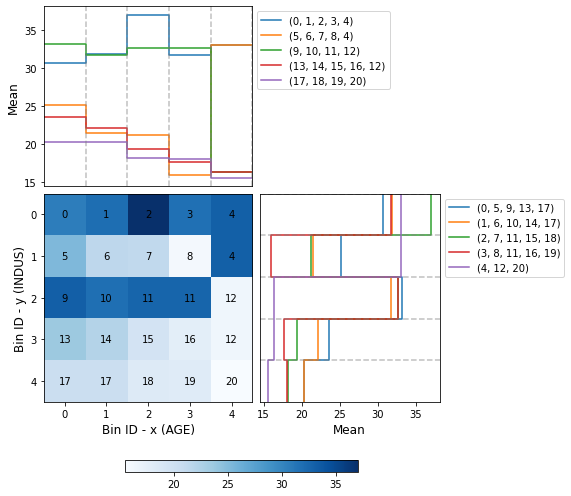

In [10]:
optb.binning_table.plot()

##### Mean transformation

Now that we have checked the binned data, we can transform our original data into mean values. You can check the correctness of the transformation using pandas ``value_counts`` method, for instance. Note that both ``x`` and ``y`` are required, and a single array is returned with the transformation.

In [11]:
z_transform_mean = optb.transform(x, y, metric="mean")
pd.Series(z_transform_mean).value_counts()

18.115493    71
15.540385    52
18.250000    50
22.179592    49
30.634884    43
19.425000    40
21.488889    36
31.860000    35
25.214815    27
23.630435    23
20.275000    16
17.646667    15
32.680000    10
37.060000    10
31.777778     9
33.185714     7
21.200000     4
16.375000     4
31.750000     2
33.050000     2
16.000000     1
dtype: int64

In [12]:
z_transform_indices = optb.transform(x, y, metric="indices")
pd.Series(z_transform_indices).value_counts()

19    71
20    52
18    50
14    49
0     43
15    40
6     36
1     35
5     27
13    23
17    16
16    15
11    10
2     10
10     9
9      7
7      4
12     4
4      2
3      2
8      1
dtype: int64

If ``metric="bins"`` the bin ids are combined.

In [13]:
z_transform_bins = optb.transform(x, y, metric="bins")
pd.Series(z_transform_bins).value_counts()

[92.30, 98.25) $\cup$ [16.57, inf)     71
[98.25, inf) $\cup$ [16.57, inf)       52
[76.25, 92.30) $\cup$ [16.57, inf)     50
[37.25, 76.25) $\cup$ [6.66, 16.57)    49
(-inf, 37.25) $\cup$ (-inf, 3.99)      43
[76.25, 92.30) $\cup$ [6.66, 16.57)    40
[37.25, 76.25) $\cup$ [3.99, 6.08)     36
[37.25, 76.25) $\cup$ (-inf, 3.99)     35
(-inf, 37.25) $\cup$ [3.99, 6.08)      27
(-inf, 37.25) $\cup$ [6.66, 16.57)     23
(-inf, 76.25) $\cup$ [16.57, inf)      16
[92.30, 98.25) $\cup$ [6.66, 16.57)    15
[76.25, 98.25) $\cup$ [6.08, 6.66)     10
[76.25, 92.30) $\cup$ (-inf, 3.99)     10
[37.25, 76.25) $\cup$ [6.08, 6.66)      9
(-inf, 37.25) $\cup$ [6.08, 6.66)       7
[98.25, inf) $\cup$ [6.08, 16.57)       4
[76.25, 92.30) $\cup$ [3.99, 6.08)      4
[98.25, inf) $\cup$ (-inf, 6.08)        2
[92.30, 98.25) $\cup$ (-inf, 3.99)      2
[92.30, 98.25) $\cup$ [3.99, 6.08)      1
dtype: int64

#### Binning table statistical analysis

The ``analysis`` method performs a statistical analysis of the binning table, computing the Information Value (IV), Weight of Evidence (WoE), and Herfindahl-Hirschman Index (HHI). The report is the same that the one for unidimensional binning with a continuous target. The main difference is that the significant tests for each bin are performed with respect to all its linked bins.

In [14]:
optb.binning_table.analysis()

----------------------------------------------------
OptimalBinning: Continuous Binning Table 2D Analysis
----------------------------------------------------

  General metrics

    IV                       4.80825509
    WoE                    171.94601939
    WoE (normalized)         7.63091898
    HHI                      0.08094955
    HHI (normalized)         0.03917453
    Quality score            0.00000067

  Significance tests

    Bin A  Bin B  t-statistic      p-value
        0      1    -0.626279 5.330261e-01
        0      5     3.151772 2.418667e-03
        1      2    -1.747295 1.020375e-01
        1      6     7.166955 9.494930e-09
        2      3     1.973052 7.794888e-02
        2      7     5.476169 1.595659e-04
        3      4    -0.603998 6.445191e-01
        3      8    29.698485 2.142801e-02
        4     12     7.038328 3.332810e-02
        5      6     3.366820 1.818855e-03
        5      9    -3.226180 1.104060e-02
        6      7     0.226611 8.321374e-01

#### Mean monotonicity

The ``monotonic_trend_x`` and ``monotonic_trend_y`` options permit forcing a monotonic trend to the mean curve on each axis. By default, both options are set to None. There are two options available: "ascending" and "descending". In this example, we force both trends to be "descending", and a minimum bin size of 0.025 (2.5%).

In [15]:
optb = ContinuousOptimalBinning2D(name_x=variable1, name_y=variable2,
                                  monotonic_trend_x="descending",
                                  monotonic_trend_y="descending", min_bin_size=0.025)
optb.fit(x, y, z)

ContinuousOptimalBinning2D(min_bin_size=0.025, monotonic_trend_x='descending',
                           monotonic_trend_y='descending', name_x='AGE',
                           name_y='INDUS')

In [16]:
optb.binning_table.build()

,Bin x,Bin y,Count,Count (%),Sum,Std,Mean,WoE,IV
0,"(-inf, 92.30)","(-inf, 3.99)",88,0.173913,2803.0,8.870303,31.852273,9.319466,1.620777
1,"[92.30, 98.25)","(-inf, 16.57)",18,0.035573,344.2,5.806372,19.122222,-3.410584,0.121325
2,"[98.25, inf)","(-inf, inf)",58,0.114625,939.7,8.837625,16.201724,-6.331082,0.725697
3,"(-inf, 37.25)","[3.99, 6.66)",34,0.067194,913.1,6.300849,26.855882,4.323076,0.290483
4,"[37.25, 92.30)","[3.99, 6.66)",59,0.116601,1471.2,7.247437,24.935593,2.402787,0.280167
5,"(-inf, 37.25)","[6.66, 16.57)",23,0.045455,543.5,2.327610,23.630435,1.097628,0.049892
6,"[37.25, 76.25)","[6.66, 16.57)",49,0.096838,1086.8,3.434815,22.179592,-0.353214,0.034205
7,"[76.25, 92.30)","[6.66, 16.57)",40,0.079051,777.0,3.359967,19.425000,-3.107806,0.245676
8,"(-inf, 76.25)","[16.57, inf)",16,0.031621,324.4,4.472765,20.275000,-2.257806,0.071393
9,"[76.25, 92.30)","[16.57, inf)",50,0.098814,912.5,8.416228,18.250000,-4.282806,0.423202


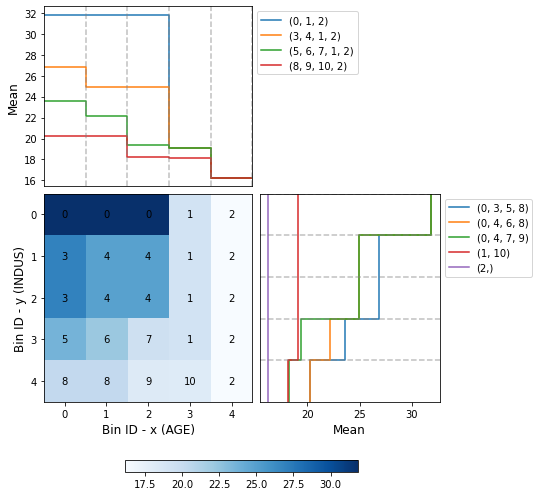

In [17]:
optb.binning_table.plot()

In [18]:
optb.binning_table.analysis()

----------------------------------------------------
OptimalBinning: Continuous Binning Table 2D Analysis
----------------------------------------------------

  General metrics

    IV                       4.48263838
    WoE                     86.36918355
    WoE (normalized)         3.83304158
    HHI                      0.11090628
    HHI (normalized)         0.03681514
    Quality score            0.00064848

  Significance tests

    Bin A  Bin B  t-statistic      p-value
        0      1     7.652734 5.085335e-09
        0      3     3.479643 7.978542e-04
        0      4     5.177909 7.689996e-07
        1      2     1.627628 1.108228e-01
        1     10     0.553529 5.825586e-01
        3      4     1.338602 1.846378e-01
        3      5     2.722868 9.181932e-03
        4      1     3.497175 1.308292e-03
        4      6     2.591442 1.122681e-02
        4      7     5.089123 2.035925e-06
        5      6     2.102164 3.968648e-02
        5      8     2.752663 1.203338e-02

#### Mininum mean difference between consecutive bins

Now, we note that the mean difference between consecutive bins is not significant enough on the x-axis. Therefore, we decide to set ``min_mean_diff_x=2.0``:

In [19]:
optb = ContinuousOptimalBinning2D(name_x=variable1, name_y=variable2,
                                  monotonic_trend_x="descending",
                                  monotonic_trend_y="descending", min_bin_size=0.025,
                                  min_mean_diff_x=2.0)
optb.fit(x, y, z)

ContinuousOptimalBinning2D(min_bin_size=0.025, min_mean_diff_x=2.0,
                           monotonic_trend_x='descending',
                           monotonic_trend_y='descending', name_x='AGE',
                           name_y='INDUS')

In [20]:
optb.binning_table.build()

,Bin x,Bin y,Count,Count (%),Sum,Std,Mean,WoE,IV
0,"(-inf, inf)","(-inf, 3.99)",92,0.181818,2932.6,8.688703,31.876087,9.343281,1.698778
1,"(-inf, 37.25)","[3.99, 6.66)",34,0.067194,913.1,6.300849,26.855882,4.323076,0.290483
2,"[37.25, inf)","[3.99, 6.66)",60,0.118577,1487.2,7.277258,24.786667,2.253860,0.267256
3,"(-inf, 76.25)","[6.66, 16.57)",72,0.142292,1630.3,3.196475,22.643056,0.110249,0.015688
4,"[76.25, inf)","[6.66, 16.57)",59,0.116601,1107.2,3.624755,18.766102,-3.766705,0.439201
5,"(-inf, 76.25)","[16.57, inf)",16,0.031621,324.4,4.472765,20.275000,-2.257806,0.071393
6,"[76.25, 98.25)","[16.57, inf)",121,0.239130,2198.7,9.436718,18.171074,-4.361732,1.043023
7,"[98.25, inf)","[16.57, inf)",52,0.102767,808.1,8.662280,15.540385,-6.992422,0.718589
8,Special,Special,0,0.000000,0.0,0.000000,0.000000,-22.532806,0.000000
9,Missing,Missing,0,0.000000,0.0,0.000000,0.000000,-22.532806,0.000000


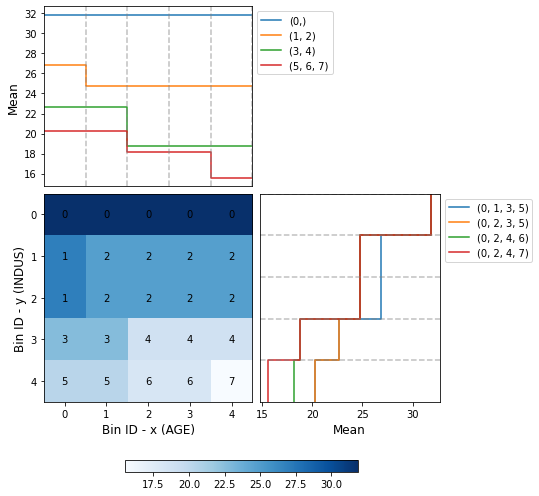

In [21]:
optb.binning_table.plot()

In [22]:
optb.binning_table.analysis()

----------------------------------------------------
OptimalBinning: Continuous Binning Table 2D Analysis
----------------------------------------------------

  General metrics

    IV                       4.54441094
    WoE                     78.47474349
    WoE (normalized)         3.48268841
    HHI                      0.15422050
    HHI (normalized)         0.06024500
    Quality score            0.18196194

  Significance tests

    Bin A  Bin B  t-statistic      p-value
        0      1     3.560295 6.228004e-04
        0      2     5.432189 2.380140e-07
        1      2     1.445094 1.524836e-01
        1      3     3.681359 6.667794e-04
        2      3     2.117773 3.738699e-02
        2      4     5.726516 1.440551e-07
        3      4     6.420686 3.039622e-09
        3      5     2.006927 5.955795e-02
        4      6     0.607723 5.441768e-01
        4      7     2.499373 1.491463e-02
        5      6     1.492816 1.441306e-01
        6      7     1.782159 7.762179e-02